 # Wisconsin Breast Cancer Dataset 
 
## Predict whether the cancer is benign or malignant 
-----

### Table of Contents:
1. [Introduction](#1)
2. [Attributes](#2)
3. [Importing libraries](#3)
4. [Dataset-Reading](#4)
5. [Exploratory Data Analysis](#5)    
6. [Visualization](#6)
7. [Standardization](#7)
8. [Outlier Detection](#8)
9. [Splitting data into features and target](#9)
10. [Logistic Regression](#10)
11. [Confusion Matrix](#11)
12. [SVM](#12)
13. [Evaluating the Model](#13)
14. [Model Improvement](#14)

<a id="1"></a>
### Introduction

Breast cancer is a critical public health concern, affecting millions of individuals worldwide. Early detection and accurate diagnosis are pivotal for successful treatment outcomes. In this study, I leverage the Wisconsin Breast Cancer dataset to develop a predictive model for distinguishing between malignant and benign tumors using logistic regression and Support Vector Machines(SVM).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. An FNA is a medical procedure used to collect cell samples from a breast mass or other tissue using a thin, hollow needle. It's often performed for diagnostic purposes to examine the cells under a microscope. They describe characteristics of the cell nuclei present in the image. The model learns to predict the time to recur (recurrence time) from previous patients and then predicts outcome for the new patient.

<a id="2" > </a>
### Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)


<a id="3" ></a>
### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="4"></a>
### Dataset- Reading

In [2]:
data=pd.read_csv("E:\Ignitus\Wisconsin Breast Cancer Dataset\data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


<a id="5"></a>
### Exploratory Data Analysis(EDA)

Exploratory Data Analysis is a crucial preliminary step in the data analysis process, providing insights that guide subsequent analysis and decision-making. It helps to understand the data's characteristics, uncover patterns, and make informed choices about modeling and interpretation.

In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isna().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Observation: Out of 33 columns/features there is an unnamed column which contains null values which is to be dropped. 
#"id" column is redundant and not useful. Hence dropping the same. 
#The data is categorical in nature with target as Diagnosis- M or B(Malignant or Benign) and all the features numerical.

In [8]:
data=data.drop(['Unnamed: 32','id'],axis=1)

In [9]:
data.shape

(569, 31)

In [10]:
# now there are 569 records each with 32 columns.

In [11]:
data.describe().T.round(2) #statistical summary

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [12]:
data.duplicated().sum()

0

<a id="6"></a>
### Visualization

In [13]:
# visualizations can provide insights that are not apparent from statistics alone

In [14]:
data.diagnosis.value_counts(normalize=True)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [15]:
print(data.shape)

(569, 31)


In [16]:
#Observation: 63% of data is found to be Benign and 37% is Malignant

Text(0.5, 1.0, 'Distribution of Target variable')

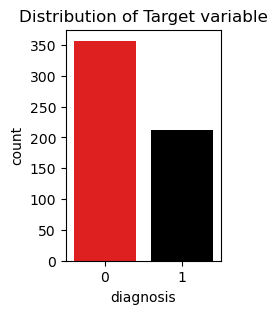

In [37]:
plt.figure(figsize=(2,3))
sns.countplot(x='diagnosis',data=data,palette=['red','black'])
plt.title("Distribution of Target variable")

In [18]:
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0}) #binary encoding target

In [19]:
data.corr()['diagnosis'].sort_values(ascending=False)#correlation matrix

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Text(0.5, 1.0, 'Correlation matrix')

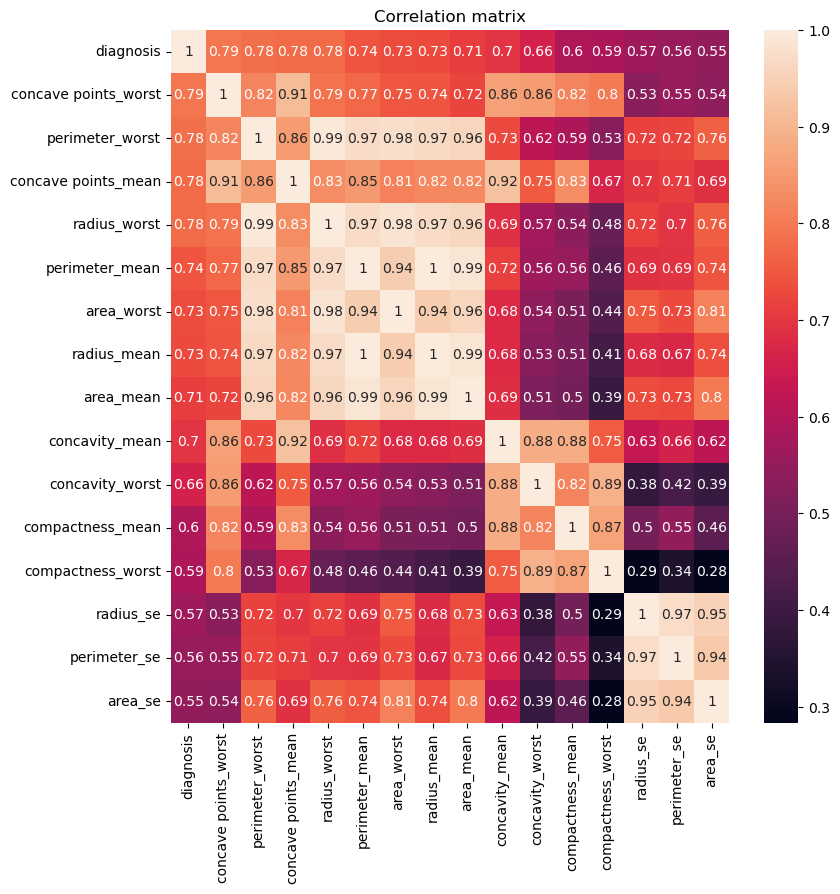

In [38]:
plt.figure(figsize=(9,9))
features=data.corr()['diagnosis'].abs().sort_values(ascending=False).index[:16]
sns.heatmap(data[features].corr(), annot=True)
plt.title('Correlation matrix')

#observation: concave points_worst, perimeter_worst, concave points_mean, radius_worst, perimeter_mean, area_worst, radius_mean, 
area_mean, concavity_mean show a strong correlation with the 'diagnosis' column. This suggests that as these features 
increase, the likelihood of the diagnosis being malignant ('M') also increases.

In [21]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

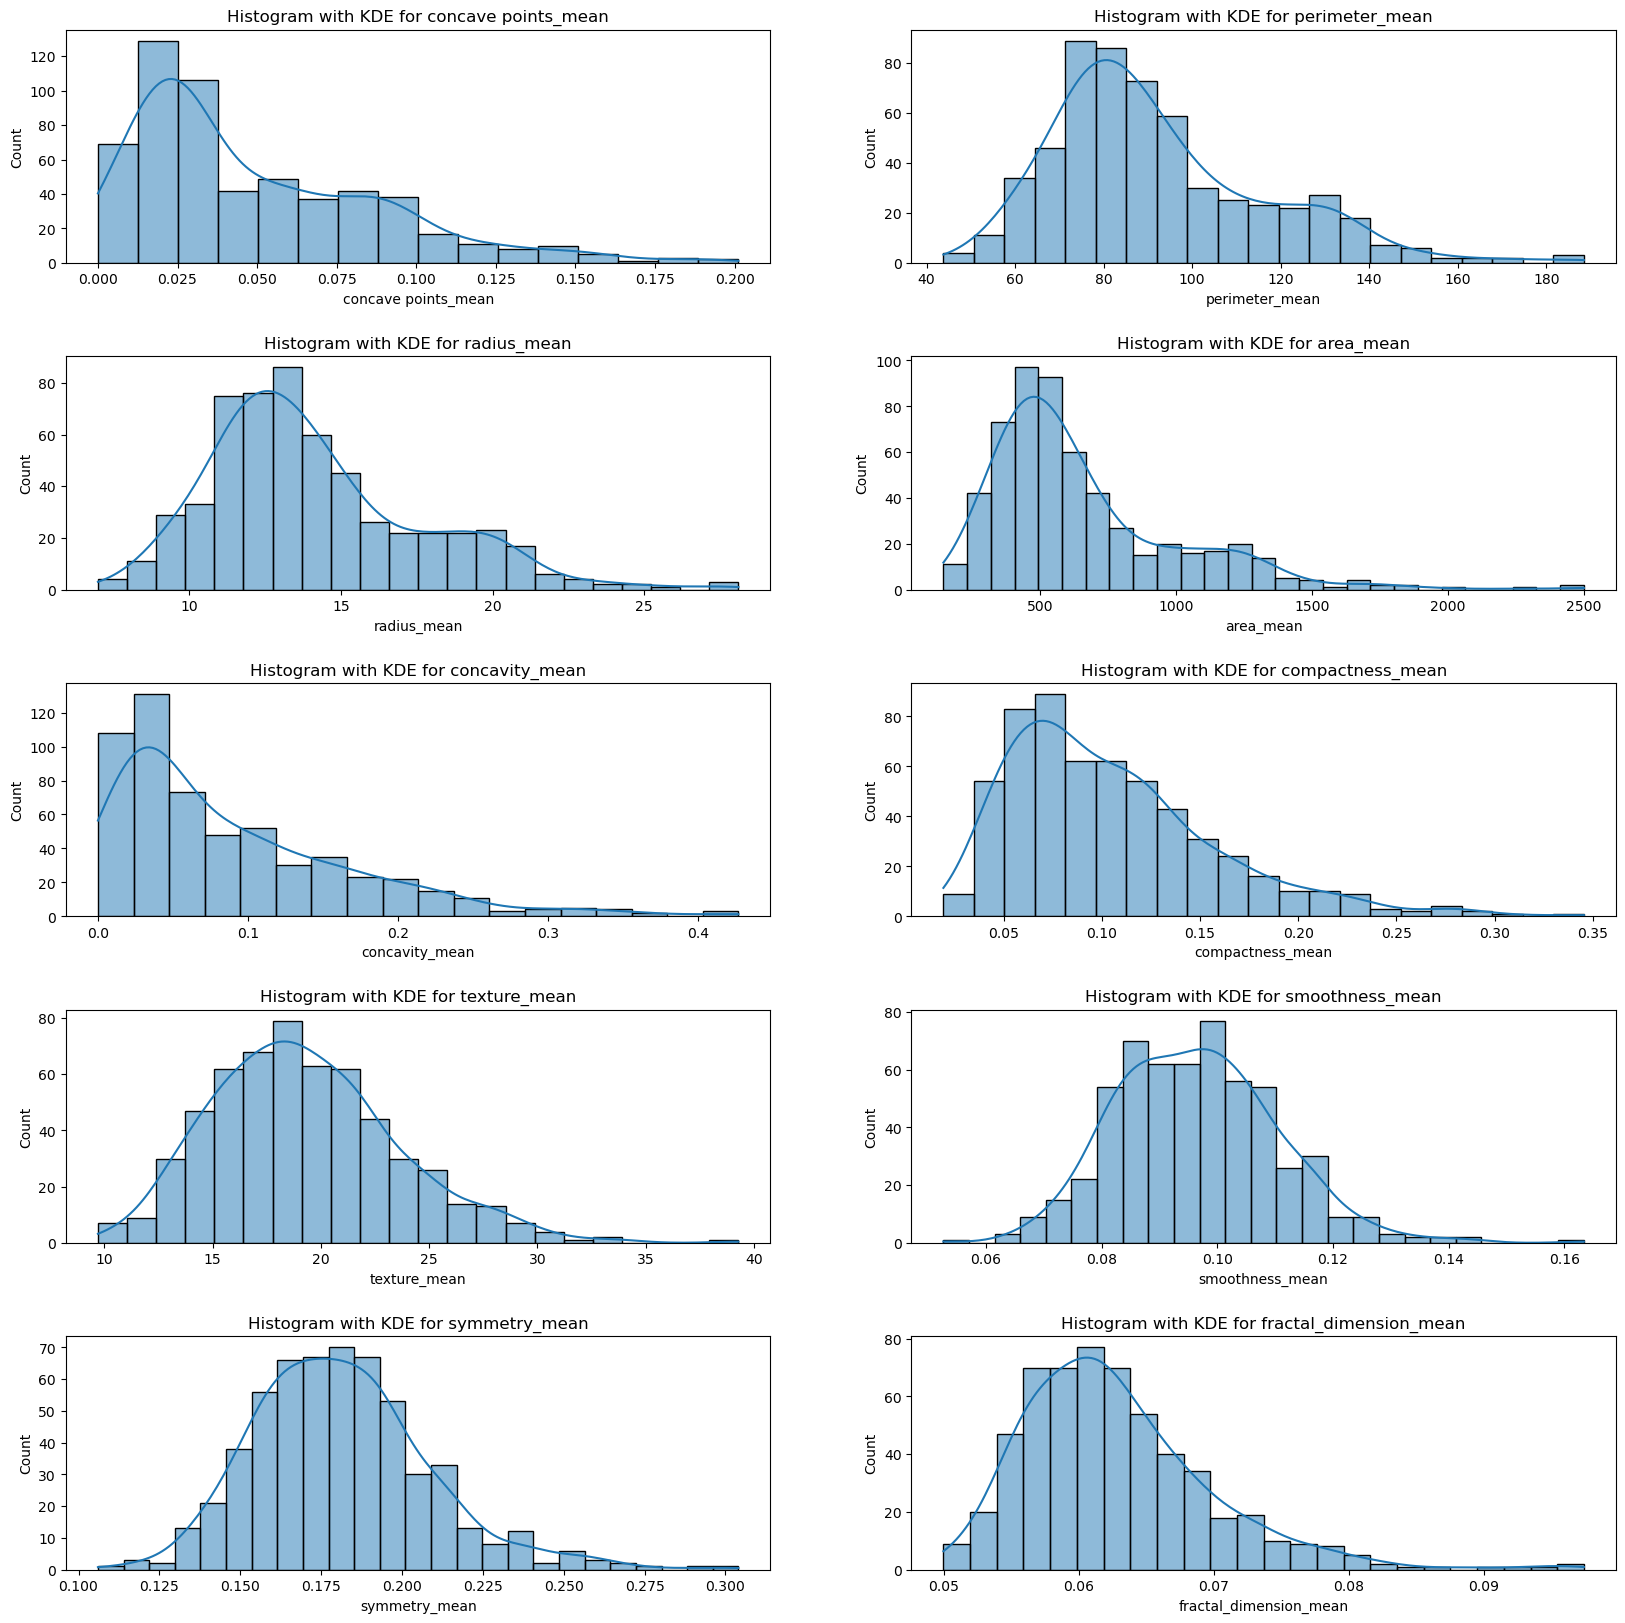

In [22]:
#histogram of features(considering only the 'mean' values of features)
fig,axes=plt.subplots(5,2,figsize=(20,20))

plt.subplot(5,2,1)
sns.histplot(x=data['concave points_mean'],kde=True)
plt.xlabel('concave points_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for concave points_mean')

plt.subplot(5,2,2)
sns.histplot(x=data['perimeter_mean'],kde=True)
plt.xlabel('perimeter_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for perimeter_mean')

plt.subplot(5,2,3)
sns.histplot(x=data['radius_mean'],kde=True)
plt.xlabel('radius_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for radius_mean')

plt.subplot(5,2,4)
sns.histplot(x=data['area_mean'],kde=True)
plt.xlabel('area_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for area_mean')

plt.subplot(5,2,5)
sns.histplot(x=data['concavity_mean'],kde=True)
plt.xlabel('concavity_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for concavity_mean')

plt.subplot(5,2,6)
sns.histplot(x=data['compactness_mean'],kde=True)
plt.xlabel('compactness_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for compactness_mean')

plt.subplot(5,2,7)
sns.histplot(x=data['texture_mean'],kde=True)
plt.xlabel('texture_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for texture_mean')

plt.subplot(5,2,8)
sns.histplot(x=data['smoothness_mean'],kde=True)
plt.xlabel('smoothness_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for smoothness_mean')

plt.subplot(5,2,9)
sns.histplot(x=data['symmetry_mean'],kde=True)
plt.xlabel('symmetry_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for symmetry_mean')

plt.subplot(5,2,10)
sns.histplot(x=data['fractal_dimension_mean'],kde=True)
plt.xlabel('fractal_dimension_mean')
plt.ylabel('Count')
plt.title('Histogram with KDE for fractal_dimension_mean')

plt.subplots_adjust(hspace=0.4)
plt.show()

<a id="7"></a>
### Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data.iloc[:,1:])
data_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [24]:
data_scaled_df=pd.DataFrame(data_scaled,columns=data.columns[1:])
data_scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<a id="8"></a>
### Outlier detection

In [25]:
col=data_scaled_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

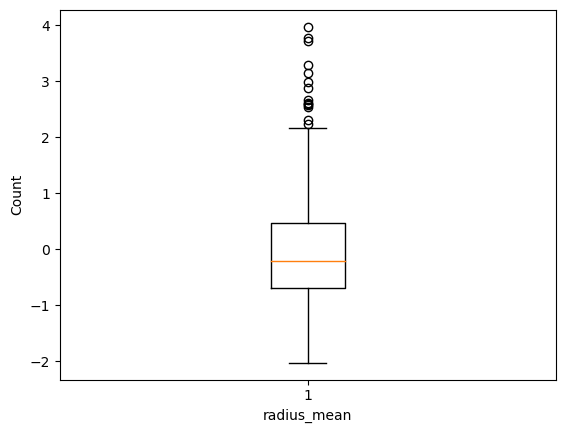

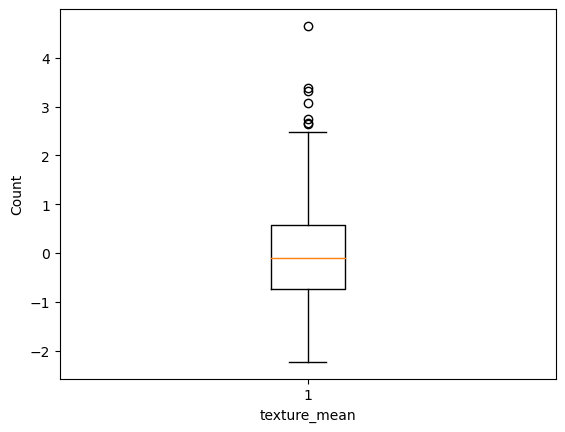

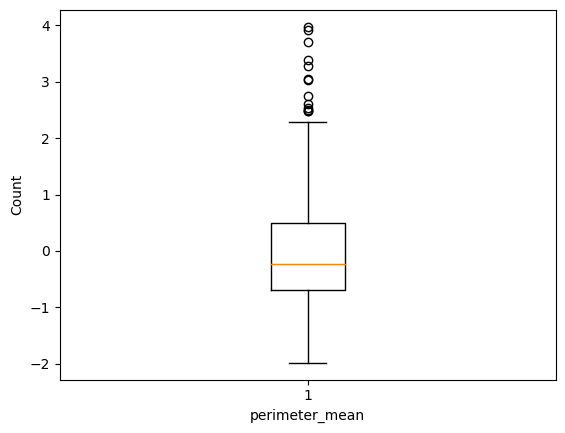

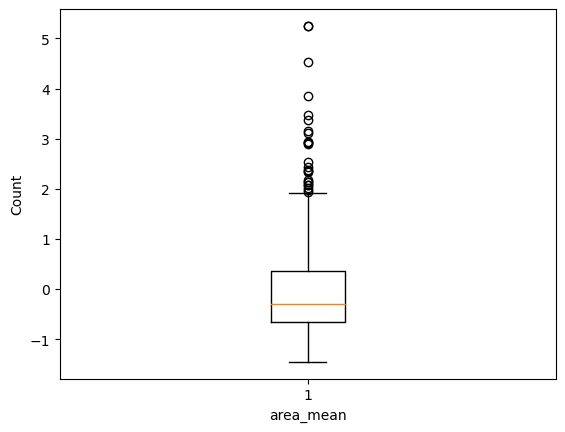

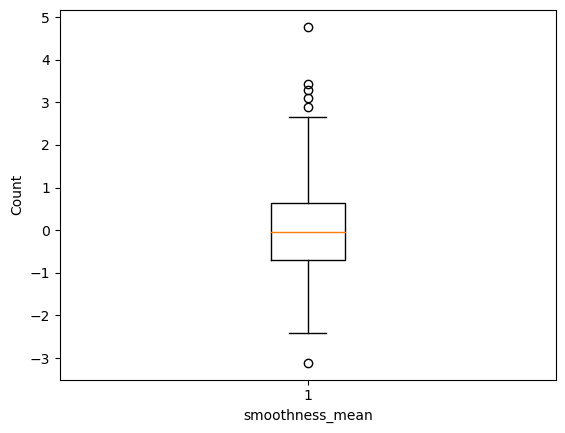

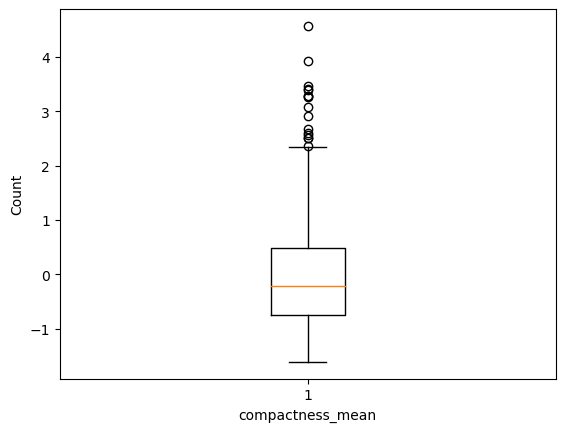

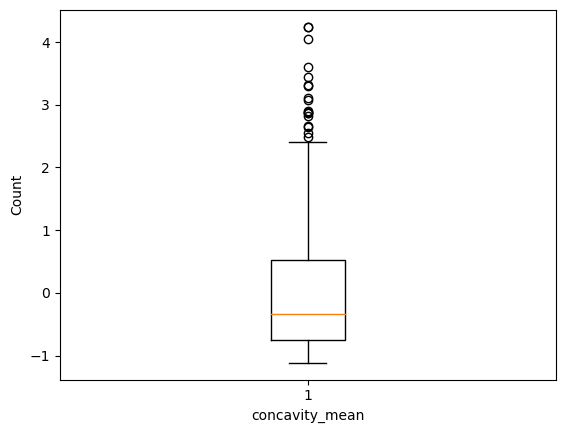

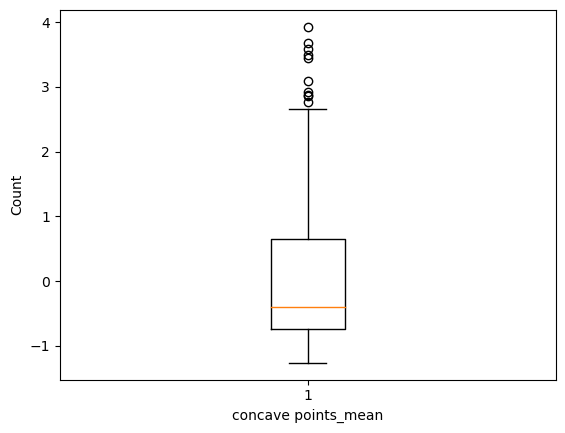

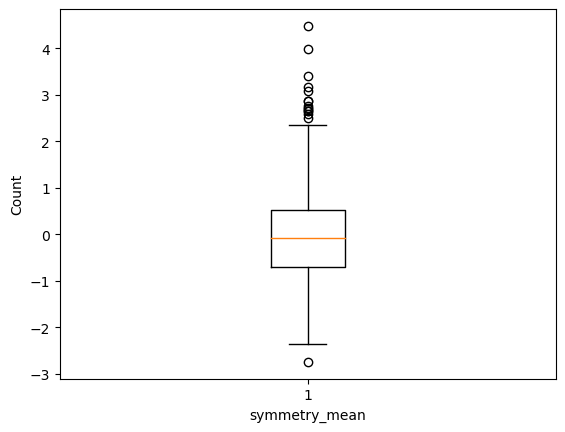

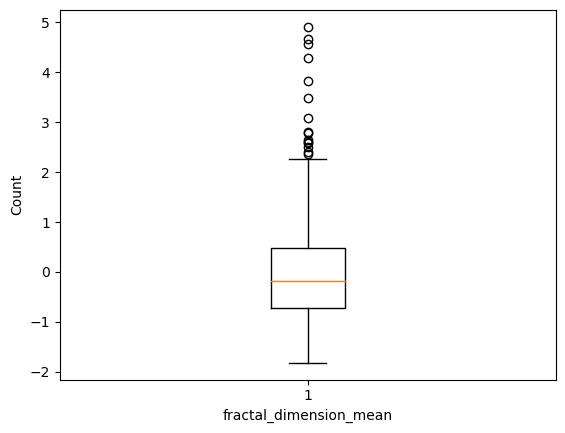

In [26]:
for i in col:
    plt.boxplot(col[i])
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

<a id="9"></a>
### Splitting data into features & target

In [27]:
y=pd.DataFrame(data['diagnosis']) #target

In [28]:
x=pd.DataFrame(data.iloc[:,1:]) #features

In [29]:
#splitting data into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

<a id="10"></a>
### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#predicting test set result
y_pred=lr.predict(x_test)

In [32]:
#calculating accuracy
print('Accuracy:',lr.score(x_train,y_train))
print('Accuracy:',lr.score(x_test,y_test))

Accuracy: 0.9648351648351648
Accuracy: 0.9473684210526315


<a id="11"></a>
### Confusion Matrix

In [33]:
#training data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,lr.predict(x_train))
cm

array([[284,   7],
       [  9, 155]], dtype=int64)

In [34]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,lr.predict(x_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       291
           1       0.96      0.95      0.95       164

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [35]:
#testing data
#confusion_matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred)
print(cm2)

[[64  2]
 [ 4 44]]


In [36]:
#classification report
from sklearn.metrics import classification_report
cr2=classification_report(y_test,y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.96      0.92      0.94        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



<a id="12"></a>
### Support Vector Machine

In [39]:
###Training the SVM Model

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [40]:
#create a pipeline that standardizes the data then trains the model
pipeline=make_pipeline(StandardScaler(),SVC(kernel='linear'))
pipeline.fit(x_train,y_train)

C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

<a id="13"></a>
### Evaluating SVM

In [42]:
predictions=pipeline.predict(x_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[65  1]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<a id="14"></a>
### Model Improvement

In [44]:
#improving the model using 'GridSearchCV'

from sklearn.model_selection import GridSearchCV

In [48]:
param_grid={'svc__C':[0.1,1,10],'svc__gamma':[1,0.1,0.01]}
grid=GridSearchCV(pipeline,param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=0.1, svc__gamma=1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc_

C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END .............................svc__C=1, svc__gamma=1; total time=   0.0s
[CV] END .............................svc__C=1, svc__gamma=1; total time=   0.0s
[CV] END .............................svc__C=1, svc__gamma=1; total time=   0.0s
[CV] END .............................svc__C=1, svc__gamma=1; total time=   0.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=   0.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=   0.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=   0.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=   0.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=   0.0s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=   0.0s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=   0.0s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=   0.0s
[CV] END ...................

C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END .........................svc__C=10, svc__gamma=0.01; total time=   0.0s


C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dilna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]},
             verbose=2)

In [49]:
# evaluating best model found by GridSearchCV

best_predictions=grid.predict(x_test)
print(confusion_matrix(y_test,best_predictions))
print(classification_report(y_test,best_predictions))

[[65  1]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

